<a href="https://colab.research.google.com/github/saxonmahar/Deeplearning/blob/main/RNN_LSTM_GRU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, GRU, Dense


In [2]:
max_features = 10000
maxlen = 200

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
def build_rnn():
    model = Sequential()
    model.add(Embedding(max_features, 128))
    model.add(SimpleRNN(64))
    model.add(Dense(1, activation='sigmoid'))
    return model


In [4]:
def build_lstm():
    model = Sequential()
    model.add(Embedding(max_features, 128))
    model.add(LSTM(64))
    model.add(Dense(1, activation='sigmoid'))
    return model


In [5]:
def build_gru():
    model = Sequential()
    model.add(Embedding(max_features, 128))
    model.add(GRU(64))
    model.add(Dense(1, activation='sigmoid'))
    return model


In [6]:
model = build_gru()  # Change to build_rnn() or build_lstm() to try other models

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


model.fit(x_train, y_train, epochs=3, batch_size=64, validation_split=0.2)


Epoch 1/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 110s 341ms/step - accuracy: 0.6772 - loss: 0.5757 - val_accuracy: 0.8324 - val_loss: 0.3735
Epoch 2/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 138s 330ms/step - accuracy: 0.8980 - loss: 0.2583 - val_accuracy: 0.8634 - val_loss: 0.3464
Epoch 3/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 104s 334ms/step - accuracy: 0.9357 - loss: 0.1760 - val_accuracy: 0.8752 - val_loss: 0.3348


In [7]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_acc:.4f}')


782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 39ms/step - accuracy: 0.8617 - loss: 0.3560
Test Accuracy: 0.8610


Epoch 1/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 104s 331ms/step - accuracy: 0.9588 - loss: 0.1162 - val_accuracy: 0.8702 - val_loss: 0.3699
Epoch 2/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 144s 336ms/step - accuracy: 0.9758 - loss: 0.0761 - val_accuracy: 0.8544 - val_loss: 0.4352
Epoch 3/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 141s 332ms/step - accuracy: 0.9828 - loss: 0.0564 - val_accuracy: 0.8492 - val_loss: 0.5134


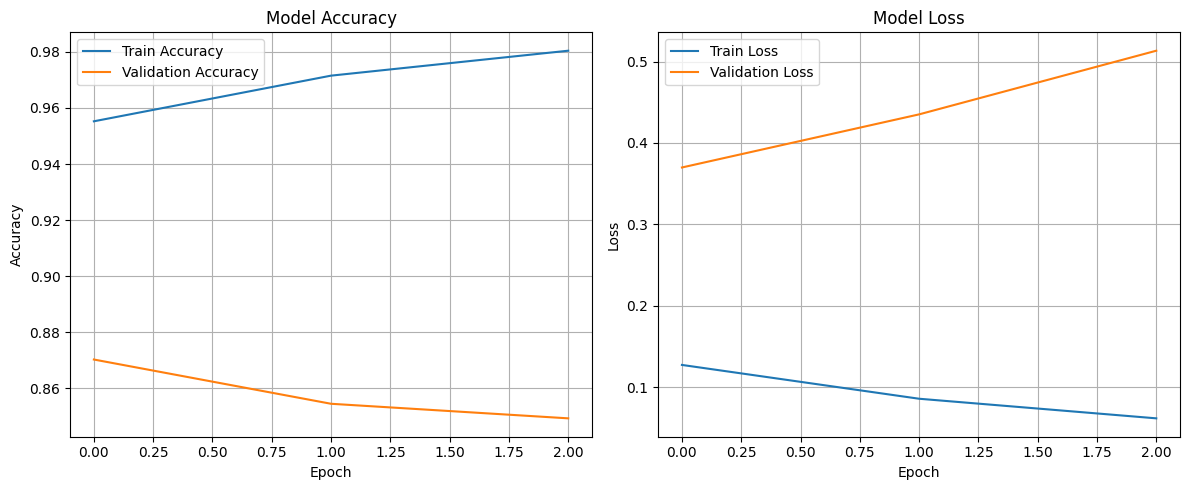

In [8]:
import matplotlib.pyplot as plt

history = model.fit(x_train, y_train,
                    epochs=3,
                    batch_size=64,
                    validation_split=0.2,
                    verbose=1)

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
